In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(16, activation = 'relu'),
    Dense(16, activation= 'relu'),
    Dense(10, activation = 'softmax')
])



In [4]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(16, activation = 'relu', name='layer_1'),
    Dense(16, activation= 'relu'),
    Dense(10),
    Softmax()
])


In [5]:
model.weights

[<tf.Variable 'layer_1/kernel:0' shape=(784, 16) dtype=float32, numpy=
 array([[ 0.02113583, -0.04405317,  0.02376182, ..., -0.0032602 ,
         -0.05477379,  0.0256281 ],
        [-0.01930432,  0.01512426, -0.00531367, ...,  0.02881312,
         -0.0718978 ,  0.00482602],
        [ 0.02191914,  0.01220272,  0.04516906, ...,  0.02436582,
          0.01491207, -0.03707949],
        ...,
        [-0.0459686 , -0.0590761 , -0.01321466, ..., -0.01227541,
          0.01296449, -0.07759744],
        [ 0.01830763, -0.04286565, -0.07948845, ...,  0.08015421,
         -0.02865211, -0.0131069 ],
        [ 0.00686169, -0.08487875, -0.06007121, ...,  0.02312136,
          0.04854086,  0.08071499]], dtype=float32)>,
 <tf.Variable 'layer_1/bias:0' shape=(16,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32)>,
 <tf.Variable 'dense_3/kernel:0' shape=(16, 16) dtype=float32, numpy=
 array([[ 0.11886874,  0.4121342 ,  0.13067403,  0.137

In [6]:
# Print the model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                170       
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [3]:
# Build the Sequential convolutional neural network model

model = Sequential([
        Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
        MaxPooling2D((3,3)),
        Flatten(),
        Dense(10, activation='softmax')

])

In [4]:
# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [5]:
# Define the model optimizer, loss function and metrics

opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()
model.compile(
    #optimizer='sgd', #'adam', 'rmsprop', 'adadelta'
    optimizer= opt,
    #loss='binary_crossentropy', # 'mean_squared_error', 'categorical_crossentropy'
    loss = 'sparse_categorical_crossentropy', #sparse_categorical_crossentropy --> data labels are integers
    #metrics=['accuracy', 'mae']
    metrics= [acc, mae]
)

In [6]:
# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)


sparse_categorical_crossentropy
[<tensorflow.python.keras.metrics.SparseCategoricalAccuracy object at 0x7f6d72936ba8>, <tensorflow.python.keras.metrics.MeanAbsoluteError object at 0x7f6d72918748>]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [7]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [8]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [9]:
# Print the shape of the training data
train_images.shape


(60000, 28, 28)

In [10]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(train_labels[0])

9


In [11]:
# Rescale the image values so that they lie in between 0 and 1.

train_images=train_images/ 255.
test_images=test_images / 255.

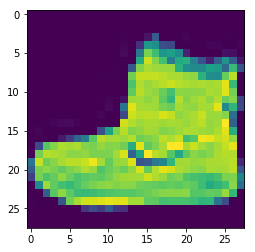

label: Ankle boot


In [12]:
# Display one of the images
i=0
img= train_images[i, :, :]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]}")


#### Fit the model

In [13]:
# Fit the model

history = model.fit(train_images[...,np.newaxis], train_labels, epochs=8, batch_size=256, verbose=2)

Train on 60000 samples
Epoch 1/8
60000/60000 - 54s - loss: 0.5782 - sparse_categorical_accuracy: 0.7941 - mean_absolute_error: 4.4200
Epoch 2/8
60000/60000 - 51s - loss: 0.3927 - sparse_categorical_accuracy: 0.8615 - mean_absolute_error: 4.4200
Epoch 3/8
60000/60000 - 50s - loss: 0.3518 - sparse_categorical_accuracy: 0.8753 - mean_absolute_error: 4.4200
Epoch 4/8
60000/60000 - 50s - loss: 0.3281 - sparse_categorical_accuracy: 0.8826 - mean_absolute_error: 4.4200
Epoch 5/8
60000/60000 - 50s - loss: 0.3098 - sparse_categorical_accuracy: 0.8901 - mean_absolute_error: 4.4200
Epoch 6/8
60000/60000 - 50s - loss: 0.2991 - sparse_categorical_accuracy: 0.8932 - mean_absolute_error: 4.4200
Epoch 7/8
60000/60000 - 50s - loss: 0.2880 - sparse_categorical_accuracy: 0.8974 - mean_absolute_error: 4.4200
Epoch 8/8
60000/60000 - 49s - loss: 0.2807 - sparse_categorical_accuracy: 0.8998 - mean_absolute_error: 4.4200


#### Plot training history

In [14]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
df.head()


,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.578224,0.794100,4.420001
1,0.392720,0.861467,4.420002
2,0.351793,0.875283,4.420001
3,0.328095,0.882633,4.420000
4,0.309772,0.890133,4.419999


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

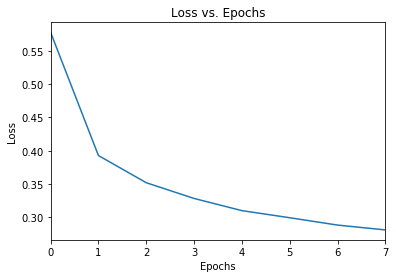

In [15]:
# Make a plot for the loss

loss_plot= df.plot(y = "loss", title = "Loss vs. Epochs", legend= False)
loss_plot.set(xlabel="Epochs", ylabel= "Loss" )

In [ ]:
# Make a plot for the accuracy



In [ ]:
# Make a plot for the additional metric



***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [16]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [18]:
# Evaluate the model

test_loss, test_accuracy, test_mae = model.evaluate(test_images[..., np.newaxis], test_labels, verbose=2)

10000/1 - 5s - loss: 0.2900 - sparse_categorical_accuracy: 0.8856 - mean_absolute_error: 4.4200


#### Make predictions from the model

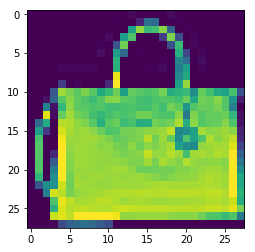

Label: Bag


In [19]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])
inx=30
test_image = test_images[inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[inx]]}")

In [20]:
# Get the model predictions

predictions= model.predict(test_image[np.newaxis,...,np.newaxis])
print(f"Model prediction: {labels[np.argmax(predictions)]}")

Model prediction: Bag
